In [1]:
# Formação Cientista de Dados
# Previsão de Séries Temporais (ARIMA)

In [4]:
# Esse código em Python utiliza bibliotecas como pandas, numpy e matplotlib para realizar uma análise de séries temporais. Ele define o tamanho e o formato das figuras a serem plotadas, importa a biblioteca datetime e instala a biblioteca pmdarima se necessário. Em seguida, ele importa a função auto_arima dessa biblioteca, que é usada para identificar automaticamente os parâmetros de um modelo de previsão ARIMA (AutoRegressive Integrated Moving Average) adequado para uma série temporal, simplificando assim o processo de modelagem e previsão de séries temporais.

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from datetime import datetime
# !pip install pmdarima - Instalar a biblioteca se precisar
from pmdarima.arima import auto_arima

In [6]:
# Conversão dos atributos que estão no formato string para o formato ano-mês - Esse código em Python utiliza a biblioteca pandas para ler um arquivo CSV que contém dados de passageiros de avião. Ele define uma função lambda chamada 'dateparse' para interpretar as datas no formato 'AAAA-MM'. Em seguida, ele lê o arquivo CSV, especificando que a coluna 'Month' deve ser tratada como data e usada como índice, aplicando a função 'dateparse' para o formato das datas e depois exibe o resultado. Isso permite manipular e analisar os dados temporais de forma eficiente no pandas.

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('../dados/AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


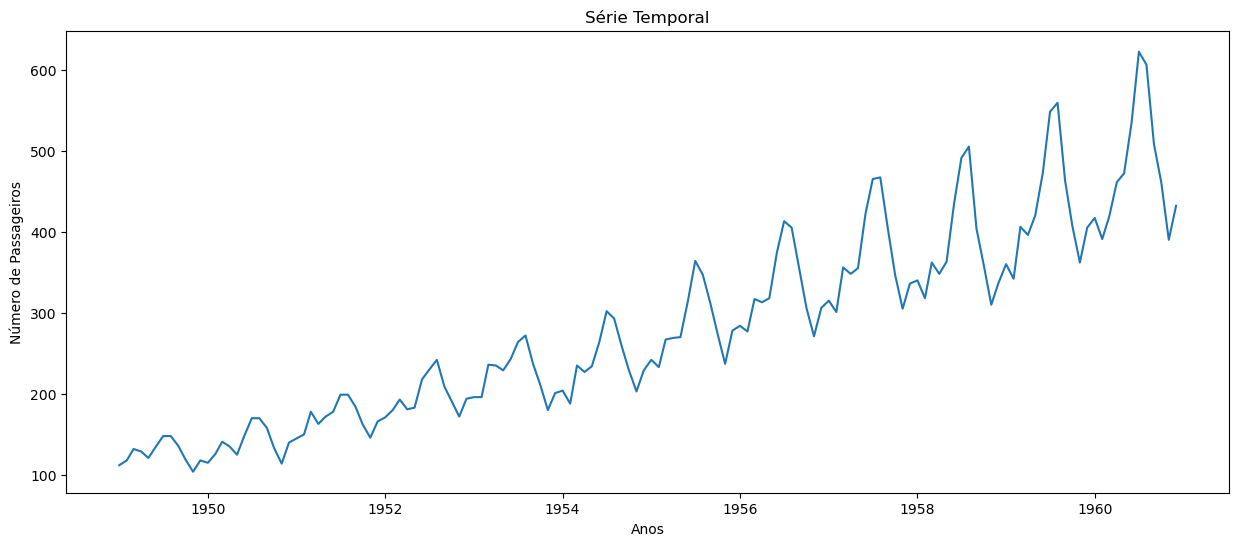

In [8]:
# Nesse código em Python, estamos criando um gráfico de uma série temporal. Primeiro, definimos o título do gráfico como "Série Temporal" e os rótulos dos eixos X e Y como "Anos" e "Número de Passageiros", respectivamente. Em seguida, utilizamos a função `plt.plot(data)` para traçar a série temporal, onde 'data' representa os dados que queremos visualizar no gráfico. Esse código é usado para gerar uma representação visual simples e clara de dados ao longo do tempo.

plt.title("Série Temporal")
plt.xlabel("Anos")
plt.ylabel("Número de Passageiros")
plt.plot(data)

- A imagem acima é um gráfico de linhas que mostra o número de passageiros em uma série de voos ao longo do tempo. 
- O gráfico tem uma linha azul, o eixo x está rotulado como "Anos" e o eixo y está rotulado como "Número de Passageiros".
- O título do gráfico é "Série Temporal".
- O eixo x varia de 1950 a 1960 e o eixo y varia de 100 a 600. 
- A linha tem uma tendência geral de alta, com algumas flutuações. 
- Isso sugere que houve um aumento geral no número de passageiros durante esse período, embora tenha havido algumas variações. 

In [9]:
#  O código apresentado cria um modelo de séries temporais usando a função 'auto_arima' de uma biblioteca, presumivelmente a 'pmdarima'. Este modelo é configurado para encontrar automaticamente os melhores parâmetros (p, d, q, P, Q) para um modelo SARIMA (Seasonal ARIMA) com base nos dados de entrada 'data'. Os argumentos 'start_p', 'start_q', 'start_d' especificam valores iniciais para a busca, enquanto 'max_p' e 'max_q' definem limites máximos para esses parâmetros. 'm' representa a sazonalidade com um período de 12 meses. A opção 'trace=True' permite um rastreamento detalhado do processo de ajuste do modelo, e 'stepwise=False' indica que a busca não deve ser passo a passo.

stepwise_model = auto_arima(
    data, start_p=1, start_d= 0, start_q=1, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False
)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.19 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1030.752, Time=0.22 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=1032.276, Time=0.63 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1030.408, Time=0.16 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=1032.128, Time=0.40 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=1034.096, Time=3.15 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=1.31 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.78 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=7.27 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=1020.639, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.35 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=1019.494, Time=1.91 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.65 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=1020.327, Time=1.96 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=1012.991, Time=2.69 sec
 ARIM

- A tabela acima é uma lista de modelos ARIMA (Autoregressive Integrated Moving Average) que foram testados em um conjunto de dados. 
- O AIC (Information Criteria) é um critério de informação usado para comparar modelos estatísticos e que um valor menor de AIC, indica um modelo melhor.
- Na tabela, o modelo ARIMA(0,1,1)(1,1,2)[12] tem o menor AIC, portanto é o modelo escolhido. 
- Este modelo tem um AR(1) de ordem 0, um MA(1) de ordem 1, um AR(1) sazonal de ordem 1 e um MA(2) sazonal de ordem 2. 
- Isso significa que o modelo assume que os valores atuais da série temporal são influenciados pelo valor anterior da série temporal, mas não por valores mais antigos, e que os valores da série temporal são influenciados por erros aleatórios da ordem 1 e 2 que ocorrem em intervalos sazonais de 12 meses.
- O tempo de ajuste do modelo é de 183,106 segundos. Isso significa que o modelo levou 183,106 segundos para ser ajustado aos dados.
- Em resumo, a tabela mostra que o modelo ARIMA(0,1,1)(1,1,2)[12] é o melhor modelo para os dados, pois tem o menor AIC e o tempo de ajuste mais rápido.

Aqui está uma explicação dos termos usados na tabela:

* ARIMA: Autoregressive Integrated Moving Average
* AIC: Information Criteria
* AR: Autoregressive
* MA: Moving Average
* S: Sazonal
* [12]: Período sazonal

In [10]:
# O código "print(stepwise_model.aic())" é utilizado para calcular e imprimir o valor do Critério de Informação Akaike (AIC) de um modelo estatístico, possivelmente relacionado a análise de séries temporais ou modelagem estatística. O AIC é uma métrica que avalia a qualidade do modelo, considerando seu ajuste aos dados e a complexidade do modelo, sendo menor melhor. Esse código em Python imprime o valor do AIC do modelo "stepwise_model" no console, fornecendo uma medida de quão bem o modelo se ajusta aos dados observados.

print(stepwise_model.aic())

1012.9907964653546


In [14]:
# No código fornecido, a variável 'train' está sendo atribuída a um subconjunto de dados da variável 'data', especificamente do período de janeiro de 1949 a dezembro de 1959. Em seguida, a saída 'train' exibe esse subconjunto de dados. Esse trecho de código é utilizado para criar uma divisão de treinamento dos dados, que geralmente é usada em tarefas de modelagem ou análise de séries temporais.

train = data.loc['1949-01-01':'1959-12-01']
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [15]:
# O código começa por criar uma variável chamada 'test' que armazena um subconjunto de dados, especificamente a partir de '1960-01-01' até o final do conjunto de dados original, que está armazenado na variável 'data'. Em seguida, ele simplesmente exibe o conteúdo da variável 'test'. Em resumo, esse código seleciona e mostra os dados a partir de janeiro de 1960 até o final do conjunto de dados original.

test = data.loc['1960-01-01':]
test

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [16]:
# Neste código, o comando "stepwise_model.fit(train)" representa o processo de ajuste (fit) de um modelo estatístico chamado "stepwise_model" aos dados de treinamento (train). Essa etapa é essencial em análises de dados e aprendizado de máquina, onde o modelo é treinado para aprender padrões nos dados de treinamento. O resultado desse processo é um modelo que pode ser usado para fazer previsões ou tomar decisões com base nos dados fornecidos durante o treinamento. Em resumo, esse código executa a fase de treinamento de um modelo estatístico usando os dados de treinamento fornecidos.

stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 2, 12),
      suppress_warnings=True, with_intercept=False)

- A tabela acima ARIMA(0,1,1)(1,1,2)[12] representa um modelo de séries temporais autorregressivo integrado médios móveis sazonais.

- ARIMA significa Autoregressive Integrated Moving Average. Um modelo ARIMA é composto por três componentes:

- *Autoregressivo (AR):* o valor atual da série temporal é explicado por um número de valores passados da própria série.
- *Integrado (I):* a série temporal pode ser diferenciada para torná-la estacionária.
- *Médias móveis (MA):* o valor atual da série temporal é explicado por um número de erros de previsão anteriores.
(0,1,1) indica que o modelo AR tem ordem 0, o modelo MA tem ordem 1 e a série temporal não foi diferenciada.

- (1,1,2) indica que o modelo AR sazonal tem ordem 1, o modelo MA sazonal tem ordem 2 e a série temporal tem sazonalidade de 12 períodos.

- [12] indica que a série temporal foi diferenciada por 12 períodos para torná-la estacionária.

- Portanto, o modelo ARIMA(0,1,1)(1,1,2)[12] é um modelo que pode ser usado para prever séries temporais com sazonalidade de 12 períodos.

In [18]:
# No trecho de código fornecido, a variável 'future_forecast' está sendo usada para armazenar as previsões futuras geradas pelo modelo 'stepwise_model'. Essas previsões são calculadas para um período de 12 unidades de tempo, provavelmente com base em algum modelo de séries temporais ou análise de dados. Portanto, a variável 'future_forecast' conterá as previsões dos próximos 12 pontos de dados com base nas informações disponíveis no modelo 'stepwise_model' e depois será impresso o resultado das previsões.

future_forecast = stepwise_model.predict(n_periods=12)
future_forecast

1960-01-01    420.237442
1960-02-01    398.454297
1960-03-01    461.907973
1960-04-01    450.687907
1960-05-01    474.007668
1960-06-01    537.917144
1960-07-01    612.241586
1960-08-01    623.600395
1960-09-01    520.170472
1960-10-01    462.320606
1960-11-01    412.933257
1960-12-01    453.755318
Freq: MS, dtype: float64

In [29]:
# No código apresentado, está sendo criado um DataFrame chamado "future_forecast" utilizando a biblioteca pandas. Ele recebe como dados de entrada outro DataFrame chamado "future_forecast" e define o índice do novo DataFrame como sendo igual ao índice do DataFrame de teste ("test"). Além disso, o novo DataFrame possui uma única coluna chamada "#Passengers". Basicamente, esse código está reformatando os dados do DataFrame original "future_forecast" para que eles estejam alinhados com o índice do DataFrame de teste e com a coluna denominada "#Passengers".

future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["#Passengers"])

<Axes: xlabel='Month'>

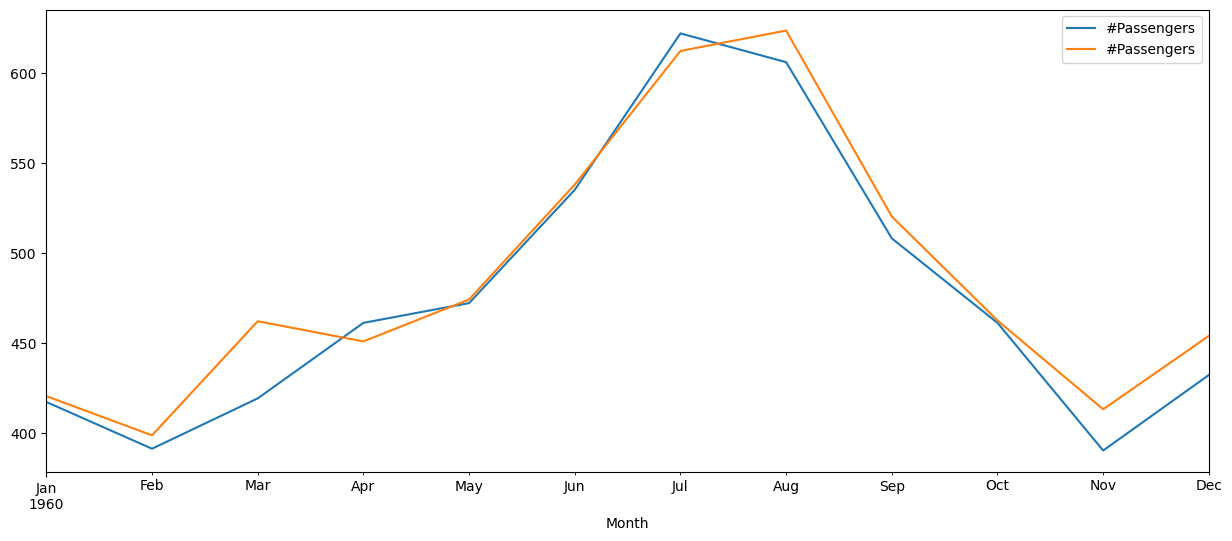

In [30]:
# azul test laranja forecast - Esse código em Python utiliza a biblioteca Pandas para concatenar os DataFrames 'test' e 'future_forecast' ao longo do eixo horizontal (axis=1) e em seguida, plota o resultado. Basicamente, ele combina esses conjuntos de dados lado a lado para visualização, o que pode ser útil para comparar as informações contidas neles em um gráfico.

pd.concat([test,future_forecast],axis=1).plot()

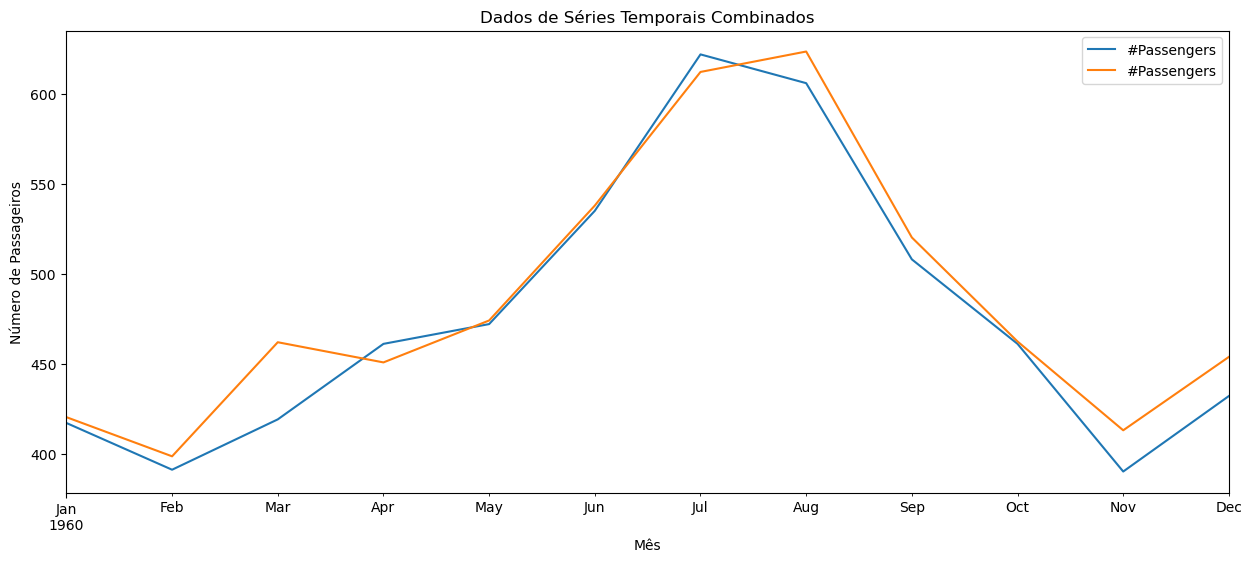

In [31]:
# Neste código, estamos combinando dois conjuntos de dados, 'test' e 'future_forecast', horizontalmente usando o método 'concat' da biblioteca Pandas. Em seguida, criamos um gráfico de séries temporais com os dados combinados usando Matplotlib. Definimos o título do gráfico como 'Dados de Séries Temporais Combinados' e rótulos dos eixos x e y como 'Mês' e 'Número de Passageiros', respectivamente. Por fim, exibimos o gráfico com 'plt.show()'. Esse código é útil para visualizar dados de séries temporais em um único gráfico.

df = pd.concat([test, future_forecast], axis=1)
ax = df.plot()

ax.set_title('Dados de Séries Temporais Combinados')
ax.set_xlabel('Mês')
ax.set_ylabel('Número de Passageiros')

plt.show()

- A imagem acima é um gráfico de linhas que mostra o número de passageiros em um voo ao longo do tempo. 
- O gráfico tem duas linhas, uma azul e uma laranja, o eixo x está rotulado como "Mês" e o eixo y está rotulado como "Número de Passageiros". 
- O eixo x tem 12 marcas de escala, uma para cada mês do ano e o eixo y tem 7 marcas de escala, variando de 400 a 600 passageiros. 
- A linha azul representa o número de passageiros em 1960 e a linha laranja representa o número de passageiros previsto para o mesmo ano. 
- As linhas mostram que o número de passageiros aumentou de janeiro a julho, depois diminuiu de julho a dezembro. 
- O maior número de passageiros foi em julho, com cerca de 600 passageiros e o menor número de passageiros foi em janeiro, com cerca de 400 passageiros.
- Com base nessa descrição, podemos ver que houve uma variação no número de passageiros ao longo do ano, com um aumento no primeiro semestre e uma diminuição no segundo semestre. 
- O pico foi em julho, com cerca de 600 passageiros, enquanto o ponto mais baixo foi em janeiro, com cerca de 400 passageiros. 

<Axes: xlabel='Month'>

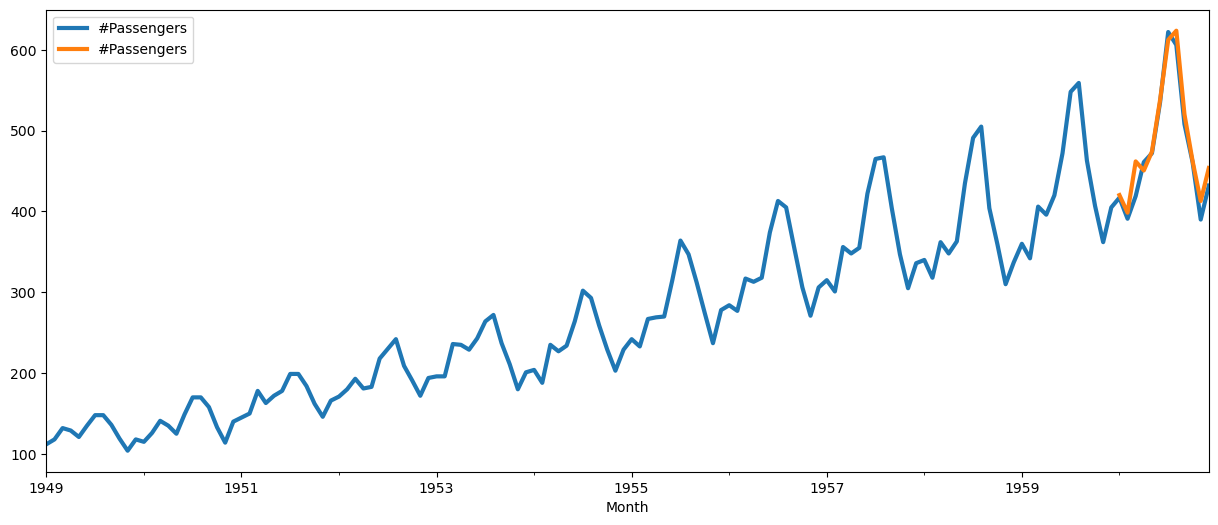

In [32]:
# Esse código utiliza a biblioteca pandas (pd) para concatenar os dataframes 'data' e 'future_forecast' ao longo do eixo horizontal (axis=1) e, em seguida, plota o gráfico resultante com uma linha espessa (linewidth=3). Essa operação permite visualizar dados de séries temporais combinadas em um único gráfico, facilitando a análise de tendências ou comparações entre eles.


pd.concat([data,future_forecast],axis=1).plot(linewidth=3)

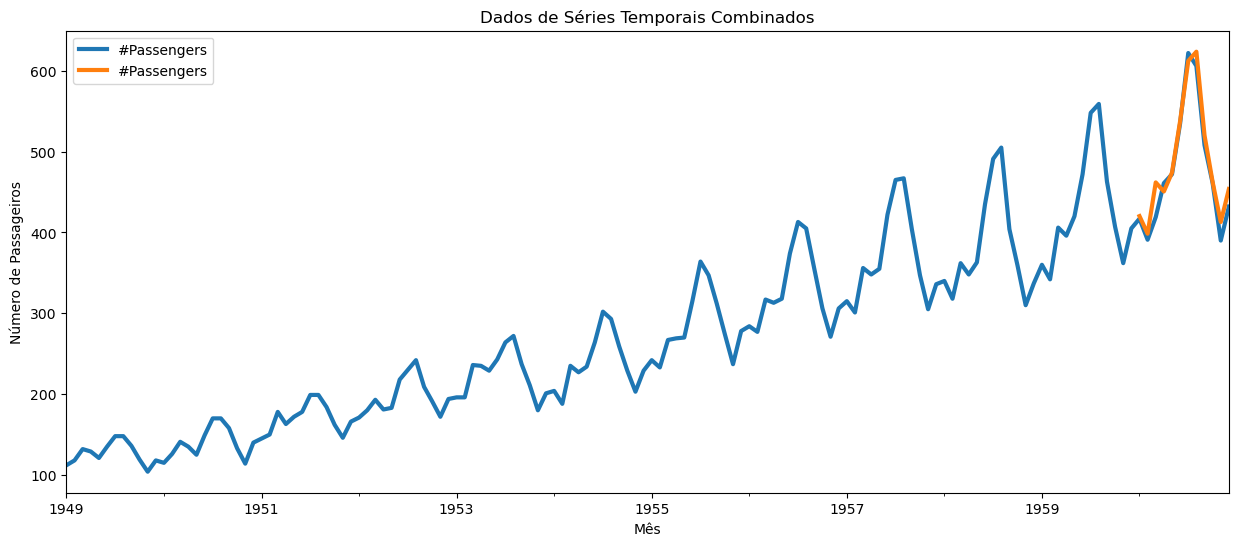

In [33]:
# Neste código Python, estamos combinando dois conjuntos de dados, 'data' e 'future_forecast', em um único DataFrame usando a função 'pd.concat'. Em seguida, criamos um gráfico de linhas com os dados desse DataFrame usando 'df.plot'. As linhas seguintes definem o título do gráfico ('Dados de Séries Temporais Combinados') e os rótulos dos eixos x e y. Por fim, exibimos o gráfico usando 'plt.show()', permitindo a visualização dos dados de séries temporais combinados em relação ao número de passageiros ao longo dos meses.

df = pd.concat([data, future_forecast], axis=1)
ax = df.plot(linewidth=3)

ax.set_title('Dados de Séries Temporais Combinados')
ax.set_xlabel('Mês')
ax.set_ylabel('Número de Passageiros')

plt.show()

- A imagem acima é um gráfico de linhas com uma linha azul e uma linha laranja. 
- O eixo x está rotulado como “Mês” e varia de 1949 a 1959. 
- O eixo y está rotulado como “Número de Passageiros” e varia de 200 a 600. 
- A linha azul representa o número de passageiros ao longo do tempo. A linha laranja representa o número previsto de passageiros ao longo do tempo.